In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd 


In [2]:
data =pd.read_csv('imdb_movie_data_2023.csv')
data.head()

,Unnamed: 0,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,0,Leave the World Behind,6.5,90000.0,67.0,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
1,1,Wonka,7.4,24000.0,66.0,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
2,2,Poor Things,8.5,6700.0,86.0,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
3,3,Killers of the Flower Moon,7.8,128000.0,89.0,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
4,4,May December,7.0,21000.0,85.0,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes


In [3]:
data = data.iloc[:, 1:]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie Name  1950 non-null   object 
 1   Rating      1944 non-null   float64
 2   Votes       1944 non-null   float64
 3   Meta Score  1833 non-null   float64
 4   Genre       1833 non-null   object 
 5   PG Rating   1874 non-null   object 
 6   Year        1950 non-null   int64  
 7   Duration    1948 non-null   object 
 8   Cast        1833 non-null   object 
 9   Director    1833 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 152.5+ KB


In [5]:
data.describe(include='all')

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
count,1950,1944.000000,1.944000e+03,1833.000000,1833,1874,1950.000000,1948,1833,1833
unique,1914,NaN,NaN,NaN,242,18,NaN,125,1823,962
top,A Christmas Carol,NaN,NaN,NaN,"Action, Adventure, Sci-Fi",R,NaN,1h 40m,"Dakota Johnson, Jamie Dornan, Eric Johnson, El...",Steven Spielberg
freq,3,NaN,NaN,NaN,92,846,NaN,57,2,25
mean,NaN,6.872788,2.702837e+05,62.163121,NaN,NaN,2006.976410,NaN,NaN,NaN
std,NaN,0.929200,3.142171e+05,16.561784,NaN,NaN,15.798125,NaN,NaN,NaN
min,NaN,2.400000,1.900000e+01,14.000000,NaN,NaN,1938.000000,NaN,NaN,NaN
25%,NaN,6.300000,6.500000e+04,51.000000,NaN,NaN,1999.000000,NaN,NaN,NaN
50%,NaN,7.000000,1.790000e+05,63.000000,NaN,NaN,2011.000000,NaN,NaN,NaN
75%,NaN,7.500000,3.550000e+05,74.000000,NaN,NaN,2019.000000,NaN,NaN,NaN


In [6]:
data.isnull().sum()

Movie Name      0
Rating          6
Votes           6
Meta Score    117
Genre         117
PG Rating      76
Year            0
Duration        2
Cast          117
Director      117
dtype: int64

Text(0.5, 1.0, 'Movie Count per Top Directors')

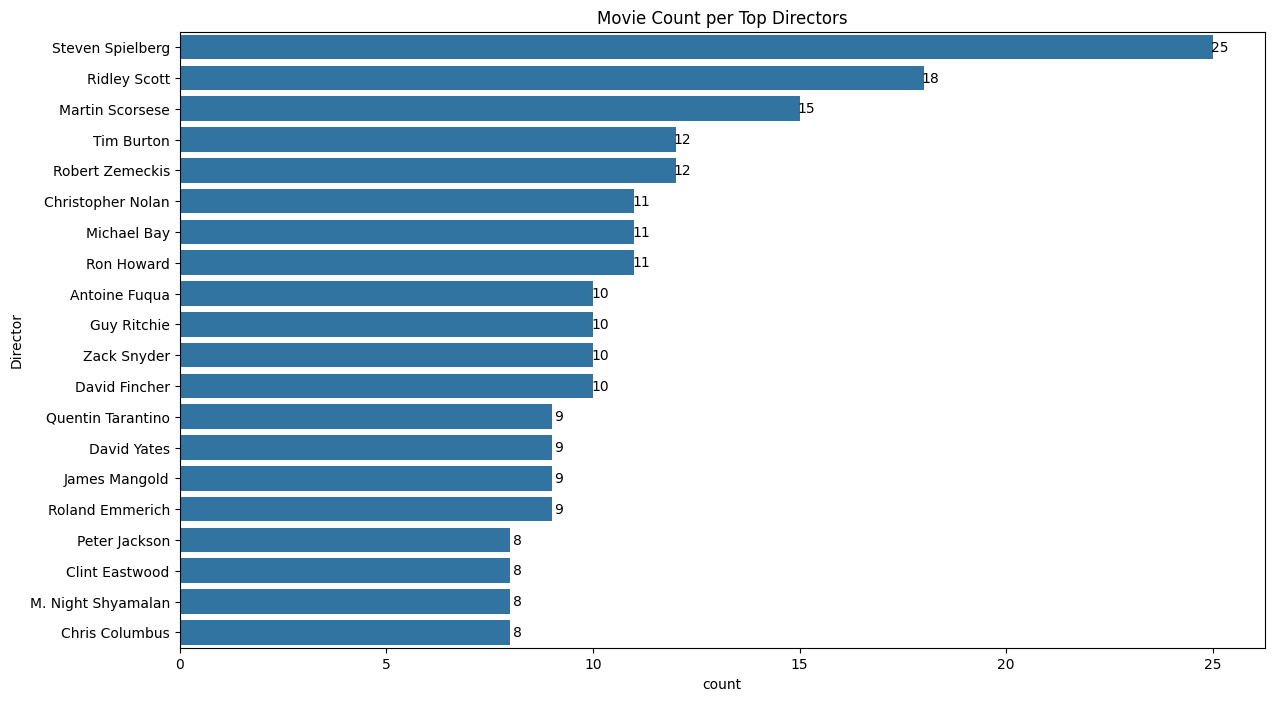

In [7]:
top_directors = data['Director'].value_counts()[:20]
top_directors = top_directors.reset_index(name='count')
df_top_directors = data[data['Director'].isin(top_directors['Director'])]

fig = plt.figure(figsize=(14,8))
ax = sns.barplot(data=top_directors, y='Director', x='count')

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='black', xytext=(5 * (abs(p.get_width())/p.get_width()), 0),
                textcoords='offset points')
plt.title('Movie Count per Top Directors')

Text(0.5, 1.0, 'Mean Rating per Top Directors')

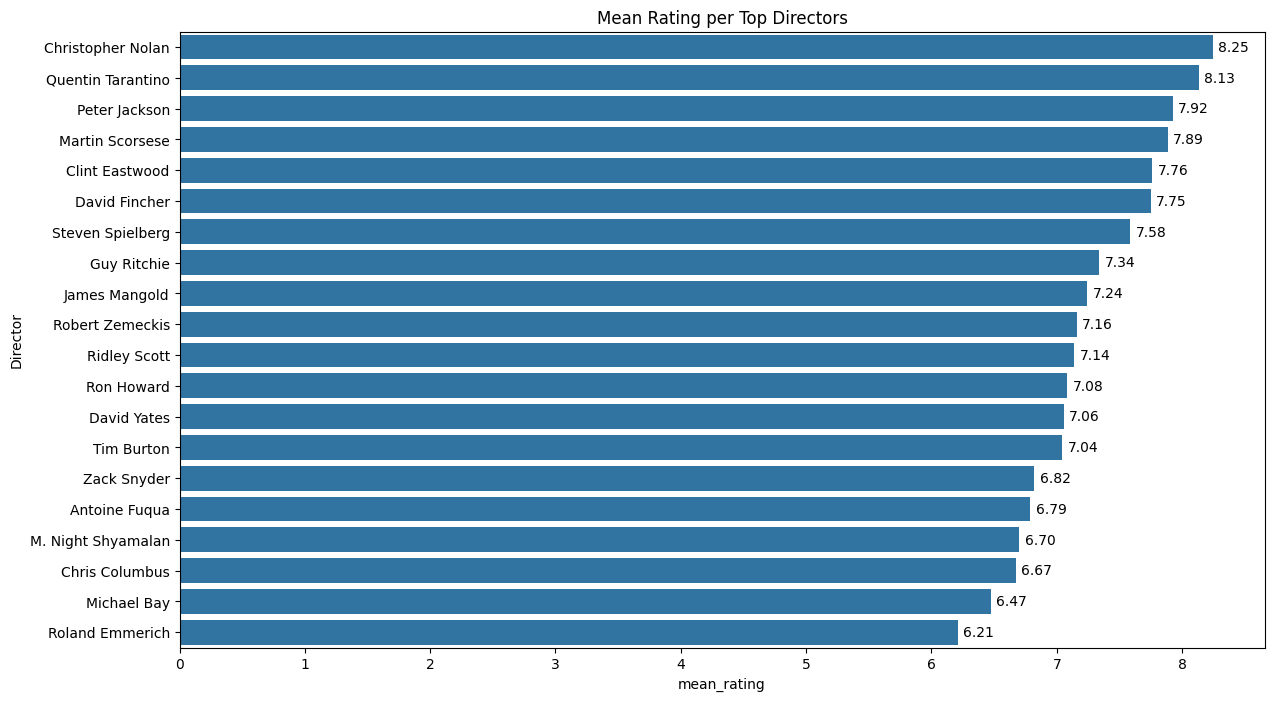

In [8]:
mean_rating_per_director = df_top_directors.groupby('Director')['Rating'].mean().reset_index(name='mean_rating')
mean_rating_per_director = mean_rating_per_director.sort_values('mean_rating', ascending = False)

fig = plt.figure(figsize=(14,8))
ax = sns.barplot(data=mean_rating_per_director, y='Director', x='mean_rating')

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='black', xytext=(15 * (abs(p.get_width())/p.get_width()), 0),
                textcoords='offset points')
plt.title('Mean Rating per Top Directors')

Text(0.5, 1.0, 'Mean Votes per Top Directors')

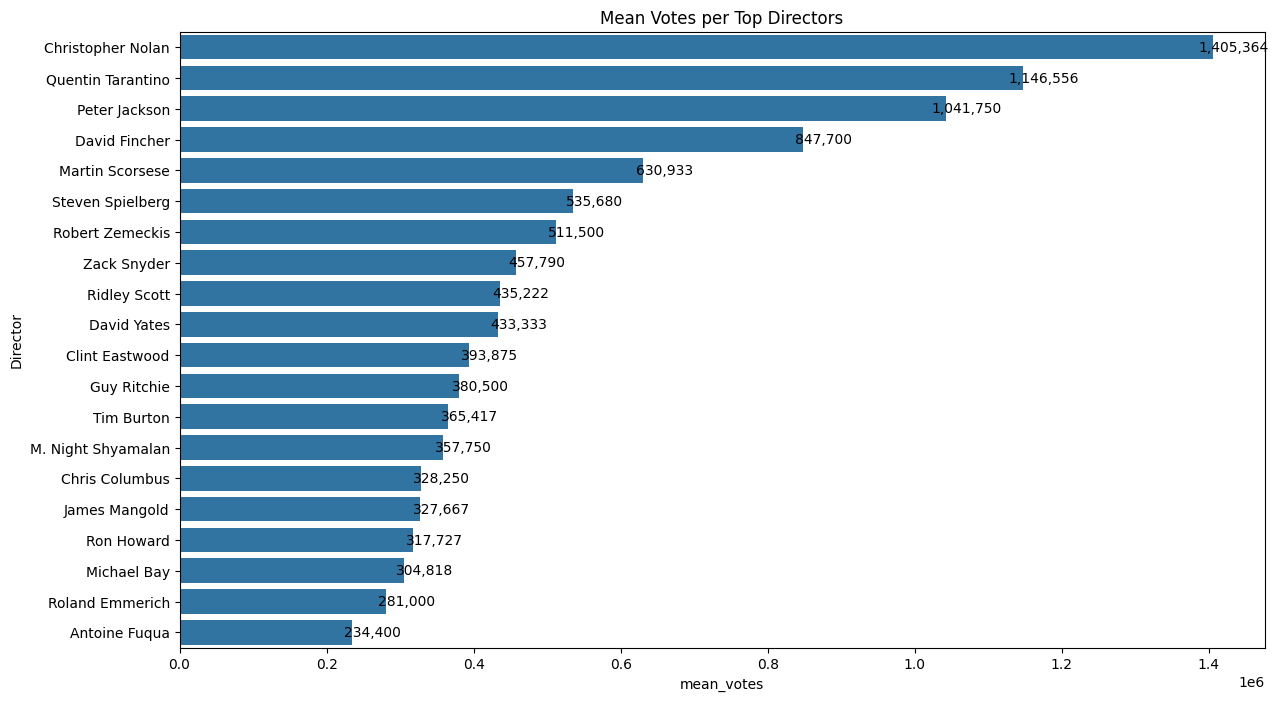

In [9]:
mean_votes_per_director = df_top_directors.groupby('Director')['Votes'].mean().reset_index(name='mean_votes')
mean_votes_per_director = mean_votes_per_director.sort_values('mean_votes', ascending = False)

fig = plt.figure(figsize=(14,8))
ax = sns.barplot(data=mean_votes_per_director, y='Director', x='mean_votes')

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='black', xytext=(15 * (abs(p.get_width())/p.get_width()), 0),
                textcoords='offset points')
plt.title('Mean Votes per Top Directors')


In [10]:
top_movies = data[data['Rating'] > 8]
top_movies = top_movies.sort_values('Rating', ascending = False)
top_movies

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
1766,Da 'Partments,9.3,82.0,NaN,NaN,NaN,2023,1h 19m,NaN,NaN
80,The Shawshank Redemption,9.3,2800000.0,82.0,Drama,R,1994,2h 22m,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Frank Darabont
88,The Godfather,9.2,2000000.0,100.0,"Crime, Drama",R,1972,2h 55m,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",Francis Ford Coppola
115,The Dark Knight,9.0,2800000.0,84.0,"Action, Crime, Drama",PG-13,2008,2h 32m,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan
312,12 Angry Men,9.0,845000.0,97.0,"Crime, Drama",Approved,1957,1h 36m,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",Sidney Lumet
...,...,...,...,...,...,...,...,...,...,...
402,Paper Moon,8.1,51000.0,77.0,"Comedy, Crime, Drama",PG,1973,1h 42m,"Ryan O'Neal, Tatum O'Neal, Madeline Kahn, John...",Peter Bogdanovich
806,"Three Billboards Outside Ebbing, Missouri",8.1,543000.0,88.0,"Comedy, Crime, Drama",R,2017,1h 55m,"Frances McDormand, Woody Harrelson, Sam Rockwe...",Martin McDonagh
253,Gone Girl,8.1,1000000.0,79.0,"Drama, Mystery, Thriller",R,2014,2h 29m,"Ben Affleck, Rosamund Pike, Neil Patrick Harri...",David Fincher
849,Before Sunrise,8.1,332000.0,77.0,"Drama, Romance",R,1995,1h 41m,"Ethan Hawke, Julie Delpy, Andrea Eckert, Hanno...",Richard Linklater


Text(0.5, 1.0, 'Top Actors by Movie Count')

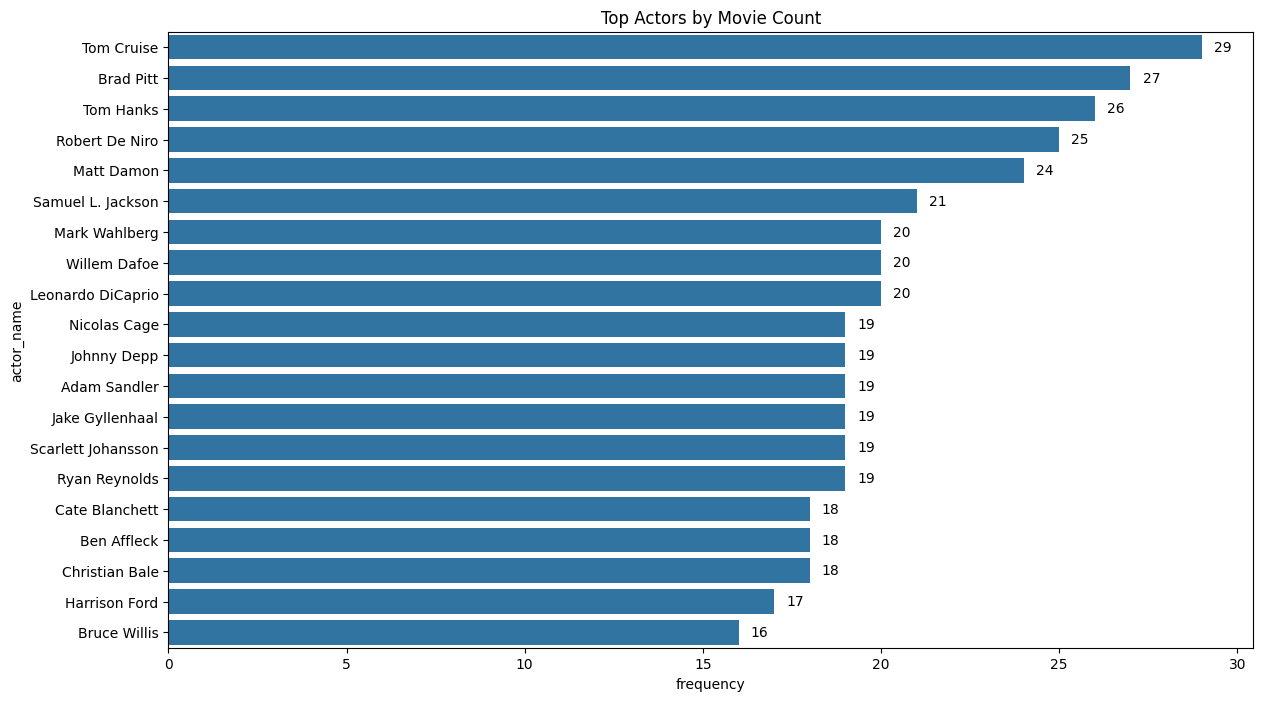

In [11]:
actors_dict = dict()
df_no_cast_na = data.dropna(subset=['Cast'])
cast_list = df_no_cast_na['Cast'].tolist()
for actors in cast_list:
    for actor in actors.split(','):
        actor = actor.strip()
        if actor in actors_dict:
            actors_dict[actor] += 1
        else:
            actors_dict[actor] = 1
            
top_actors_df = pd.DataFrame(list(actors_dict.items()), columns=['actor_name', 'frequency'])

top_actors_df = top_actors_df.sort_values(by='frequency', ascending=False)

top_actors_df = top_actors_df.head(20)

fig = plt.figure(figsize=(14,8))
ax = sns.barplot(data=top_actors_df, y='actor_name', x='frequency')

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='black', xytext=(15 * (abs(p.get_width())/p.get_width()), 0),
                textcoords='offset points')
plt.title('Top Actors by Movie Count')

In [12]:
data['PG Rating'].value_counts()

PG Rating
R           846
PG-13       614
PG          278
G            47
TV-MA        18
Approved     17
TV-PG        10
Passed       10
Unrated       8
TV-14         7
NC-17         7
TV-G          3
X             3
TV-Y7         2
18+           1
16+           1
13+           1
GP            1
Name: count, dtype: int64

Text(0.5, 1.0, 'Movies by Year distribution')

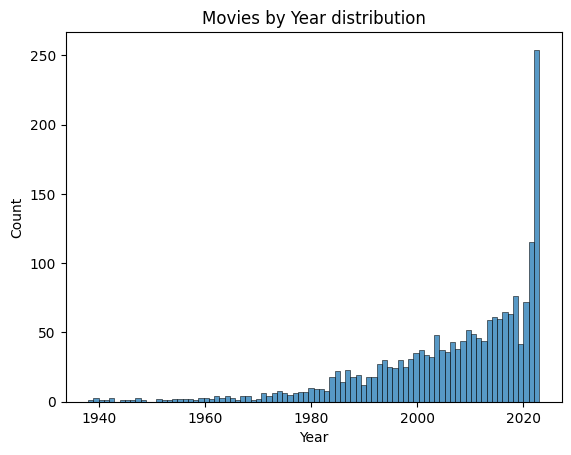

In [13]:
min_year = data['Year'].min()
max_year = data['Year'].max()

sns.histplot(data=data, x='Year', bins=max_year-min_year+1)
plt.title('Movies by Year distribution')

Text(0.5, 1.0, 'Meta Score by IMDB Rating')

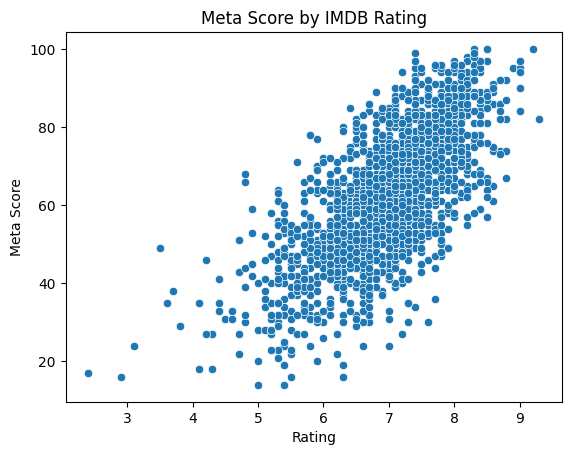

In [14]:
sns.scatterplot(data = data, x = 'Rating', y = 'Meta Score')
plt.title('Meta Score by IMDB Rating')

In [15]:
mean_votes_per_director

,Director,mean_votes
2,Christopher Nolan,1.405364e+06
12,Quentin Tarantino,1.146556e+06
11,Peter Jackson,1.041750e+06
4,David Fincher,8.477000e+05
9,Martin Scorsese,6.309333e+05
17,Steven Spielberg,5.356800e+05
14,Robert Zemeckis,5.115000e+05
19,Zack Snyder,4.577900e+05
13,Ridley Scott,4.352222e+05
5,David Yates,4.333333e+05


In [16]:
my_favorite_directors = ['Christopher Nolan', 'Quentin Tarantino','Guy Ritchie']
data[data['Director'].isin(my_favorite_directors)].sort_values('Rating', ascending = False)

,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
115,The Dark Knight,9.0,2800000.0,84.0,"Action, Crime, Drama",PG-13,2008,2h 32m,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan
117,Pulp Fiction,8.9,2200000.0,95.0,"Crime, Drama",R,1994,2h 34m,"John Travolta, Uma Thurman, Samuel L. Jackson,...",Quentin Tarantino
146,Inception,8.8,2500000.0,74.0,"Action, Adventure, Sci-Fi",PG-13,2010,2h 28m,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Christopher Nolan
75,Interstellar,8.7,2000000.0,74.0,"Adventure, Drama, Sci-Fi",PG-13,2014,2h 49m,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Christopher Nolan
217,Django Unchained,8.5,1700000.0,81.0,"Drama, Western",R,2012,2h 45m,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",Quentin Tarantino
278,The Prestige,8.5,1400000.0,66.0,"Drama, Mystery, Sci-Fi",PG-13,2006,2h 10m,"Christian Bale, Hugh Jackman, Scarlett Johanss...",Christopher Nolan
397,Memento,8.4,1300000.0,83.0,"Mystery, Thriller",R,2000,1h 53m,"Guy Pearce, Carrie-Anne Moss, Joe Pantoliano, ...",Christopher Nolan
297,The Dark Knight Rises,8.4,1800000.0,78.0,"Action, Drama, Thriller",PG-13,2012,2h 44m,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...",Christopher Nolan
7,Oppenheimer,8.4,553000.0,89.0,"Biography, Drama, History",R,2023,3h,"Cillian Murphy, Emily Blunt, Matt Damon, Rober...",Christopher Nolan
177,Inglourious Basterds,8.4,1500000.0,69.0,"Adventure, Drama, War",R,2009,2h 33m,"Brad Pitt, Diane Kruger, Eli Roth, Mélanie Lau...",Quentin Tarantino
